In [245]:
import pandas as pd
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import nltk
import numpy as np
import re
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def raw_text(url):
    """Takes a URL as input and performs web scrapping to retrieve the body of the
    webpage (in this case a Linkedin ad)"""
    ad = requests.get(url) #Retrieve webpage
    Html = BeautifulSoup(ad.text, 'html.parser') #Convert html into a nicer format
    text_body = Html.find_all('div', 
                              {'class':"show-more-less-html__markup show-more-less-html__markup--clamp-after-5"})
    text_body = text_body[0].text
    return text_body
def clean_text(doc):
    """Take an unstructured document and tokenize it into a list of words. 
    Then standardize it by lowercasing and lemmatizing each word"""
    words = re.findall(r'(?:[a-zA-Z]|#|"+")+',doc) #Find all alphabetical words (Preserve + and # for C++ and C#)
    clean = [i for i in words if i.isupper() or i.islower()] #Retrieve all words that aren't glued to each other
    dirty = [i for i in words if not i.islower() and not i.isupper()] #Retrieve words stuck together
    dirty = [re.findall('[a-zA-Z][^A-Z]*',i) for i in dirty] #Split all the tangled words ie split 'ThisExample' into ['This','Example']
    clean2 = [j for i in dirty for j in i] #Unlist the list of lists
    words = clean + clean2 #Combine all the words together
    stopwords = nltk.corpus.stopwords.words("english")
    words = [i.lower() for i in words] #Lowercase all words
    words = [i for i in words if i not in stopwords] #Filter out stopwords
    tag_words = nltk.pos_tag(words) #Begin lemmatizing by tagging each word
    tag_words = [(i, wordnet_pos(j)) for (i, j) in tag_words] #Convert the tags into something the lemmatizer understands
    lemmatizer = nltk.WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(i, j) for i, j in tag_words] #Lemmatize the words
    #Document should be cleaned up
    return clean_words
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""   
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}   
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN) #Function created by Bo Ning in Week 6-2
def unlist(LIST):
    """Take a list and concatenate all objects inside"""
    STRING = ''
    for i in LIST:
        STRING = STRING +' '+ i
    STRING = STRING.strip() #Get rid of white space
    return STRING


In [246]:
analyst = pd.read_csv('data_analyst.csv')
science = pd.read_csv('data_scientist.csv')

In [317]:
def f(x):
    x = x.strip('$')
    x = x.replace(',','')
    return x
science.loc[~science['Salary'].isna(),'Salary'] = science.loc[~science['Salary'].isna(),'Salary'].map(f)
science['Salary'] = science['Salary'].astype(float)
science

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,5,144500.0,Yes,PhD,No,1.0,https://www.linkedin.com/jobs/view/3480836400/...,Scientist
1,2,144500.0,Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3482317582/...,Scientist
2,1,144500.0,Yes,Master,No,0.0,https://www.linkedin.com/jobs/view/3485598972/...,Scientist
3,4,144500.0,Yes,PhD,Yes,0.0,https://www.linkedin.com/jobs/view/3474104997/...,Scientist
4,4,144500.0,Yes,Unspecified,No,1.0,https://www.linkedin.com/jobs/view/3499243413/...,Scientist
...,...,...,...,...,...,...,...,...
95,6,144500.0,Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3483125003/...,Scientist
96,5,144500.0,Yes,Master,Yes,0.0,https://www.linkedin.com/jobs/view/3485548898/...,Scientist
97,6,162000.0,No,Bachelor,No,0.0,https://www.linkedin.com/jobs/view/3507782958/...,Scientist
98,4,144500.0,Yes,Master,Yes,3.0,https://www.linkedin.com/jobs/view/3494351211/...,Scientist


In [450]:
df = pd.concat([analyst,science])
df = df.iloc[:,1:]
df = df.drop_duplicates() #Drop duplicate ads
df = df.reset_index(drop = True)
df

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,2,96955.0,No,Master,Yes,1.0,https://www.linkedin.com/jobs/view/3249211510/...,Analyst
1,6,96955.0,No,Master,No,1.0,https://www.linkedin.com/jobs/view/3487242175/...,Analyst
2,4,96955.0,No,Bachelor,Yes,1.0,https://www.linkedin.com/jobs/view/3505418682/...,Analyst
3,0,96955.0,No,Unspecified,No,2.0,https://www.linkedin.com/jobs/view/3498974602/...,Analyst
4,6,96955.0,No,Unspecified,No,5.0,https://www.linkedin.com/jobs/view/3508607089/...,Analyst
...,...,...,...,...,...,...,...,...
193,6,144500.0,Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3483125003/...,Scientist
194,5,144500.0,Yes,Master,Yes,0.0,https://www.linkedin.com/jobs/view/3485548898/...,Scientist
195,6,162000.0,No,Bachelor,No,0.0,https://www.linkedin.com/jobs/view/3507782958/...,Scientist
196,4,144500.0,Yes,Master,Yes,3.0,https://www.linkedin.com/jobs/view/3494351211/...,Scientist


To answer our question regarding how generic Linkedin Ads are, we will use NLP to determine how similar one ad is to another. Since we are purely interested in the vocabulary of each Linkedin Ad, we will employ a bag of words model where order does not matter. Furthermore, since we only care about vocabulary, frequency doesn't matter, only prescence does which is why will make the counts binary. Finally, when it comes to cleaning the text, we will standardize each text by lowercasing and lemmatizing each word. We will then remove common stop words and only include alphabetic characters with the exception of # and + due the importance of not dropping programming languages like C# or C++.

In [453]:
analysts = df.loc[df['Type'] == 'Analyst','url']
analysts = analysts.tolist() #Extract all the urls for Data Analyst Ads

In [454]:
scientists = df.loc[df['Type'] == 'Scientist','url']
scientists = scientists.tolist() #Extract all the urls for Data Scientist Ads

In [250]:
anl_text1 = [raw_text(i) for i in analysts[:10]] #Retrieve the body of the first 10 Linkedin
#Ads for Data Analysts. Do this to the rest of the ads for Analysts and Scientists.

In [251]:
anl_text2 = [raw_text(i) for i in analysts[10:20]]

In [252]:
anl_text3 = [raw_text(i) for i in analysts[20:30]]

In [253]:
anl_text4 = [raw_text(i) for i in analysts[30:40]]

In [254]:
anl_text5 = [raw_text(i) for i in analysts[40:50]]

In [255]:
anl_text6 = [raw_text(i) for i in analysts[50:60]]

In [256]:
anl_text7 = [raw_text(i) for i in analysts[60:70]]

In [257]:
anl_text8 = [raw_text(i) for i in analysts[70:80]]

In [258]:
anl_text9 = [raw_text(i) for i in analysts[80:90]]

In [259]:
anl_text10 = [raw_text(i) for i in analysts[90:]]

In [260]:
sci_text1 = [raw_text(i) for i in scientists[:10]]

In [261]:
sci_text2 = [raw_text(i) for i in scientists[10:20]]

In [262]:
sci_text3 = [raw_text(i) for i in scientists[20:30]]

In [263]:
sci_text4 = [raw_text(i) for i in scientists[30:40]]

In [264]:
sci_text5 = [raw_text(i) for i in scientists[40:50]]

In [265]:
sci_text6 = [raw_text(i) for i in scientists[50:60]]

In [266]:
sci_text7 = [raw_text(i) for i in scientists[60:70]]

In [267]:
sci_text8 = [raw_text(i) for i in scientists[70:80]]

In [268]:
sci_text9 = [raw_text(i) for i in scientists[80:90]]

In [269]:
sci_text10 = [raw_text(i) for i in scientists[90:]]

In [270]:
anl_text =  (anl_text1 + anl_text2 + anl_text3 + anl_text4 + anl_text5 +
            anl_text6 +anl_text7 + anl_text8 + anl_text9 + anl_text10) #Combine 
#all the bodies of the text into one list

In [458]:
len(scientists)

100

In [272]:
sci_text = (sci_text1 + sci_text2 + sci_text3 + sci_text4 + sci_text5 + sci_text6 +
           sci_text7 + sci_text8 + sci_text9 + sci_text10) #Do the same for scientists

In [273]:
clean_anl = [clean_text(i) for i in anl_text] #Clean the text by lowercasing lemmatizing
#And removing stopwords with our function clean_text

In [274]:
clean_sci = [clean_text(i) for i in sci_text]

In [275]:
anl_par = [unlist(i) for i in clean_anl] #Put the words back into sentences so we can 
#Use our model

In [276]:
sci_par = [unlist(i) for i in clean_sci]

To begin this analysis, we will look at the similarity within groups. How similar are the data analyst ads to each other? What about data scientists. Then we will look at similarity between groups. How similar are data analyst ads compared to data scientist ads in general?

In [354]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True)
#Fit a bag of words model where order doesn't matter and the "frequency" is binary
#for data analyst ads
freq = vec.fit_transform(anl_par)

In [355]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2') #Normalize vectors

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [356]:
worddf = pd.DataFrame(sim, 
                      columns = vec.get_feature_names_out()) 

In [358]:
similarity = pd.DataFrame(sim @ sim.T) #Calculate cosine similarity

In [282]:
similarity.to_csv('Analyst_Similarity.csv')

In [359]:
similarity

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.244096,0.294795,0.220416,0.227980,0.313014,0.296946,0.212776,0.271024,0.244492,...,0.307538,0.066227,0.279553,0.103905,0.274226,0.225493,0.127192,0.351159,0.351159,0.201316
1,0.244096,1.000000,0.273442,0.204450,0.239200,0.318666,0.271386,0.298146,0.215985,0.289584,...,0.211487,0.092144,0.280912,0.168662,0.264022,0.229565,0.149440,0.284579,0.284579,0.186733
2,0.294795,0.273442,1.000000,0.231778,0.277188,0.345041,0.330621,0.276305,0.262467,0.299312,...,0.303136,0.089538,0.308533,0.130444,0.348627,0.212449,0.124468,0.331264,0.331264,0.170581
3,0.220416,0.204450,0.231778,1.000000,0.172169,0.239793,0.280415,0.271749,0.223807,0.189029,...,0.155440,0.069338,0.209061,0.145048,0.188982,0.153551,0.094696,0.227043,0.227043,0.181309
4,0.227980,0.239200,0.277188,0.172169,1.000000,0.302507,0.253035,0.266181,0.169143,0.285262,...,0.234950,0.112867,0.187168,0.121742,0.254380,0.215580,0.122834,0.258283,0.258283,0.138343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.225493,0.229565,0.212449,0.153551,0.215580,0.277626,0.246414,0.221398,0.210613,0.188667,...,0.272607,0.166091,0.225352,0.097719,0.274224,1.000000,0.170126,0.254933,0.254933,0.195439
96,0.127192,0.149440,0.124468,0.094696,0.122834,0.169738,0.185735,0.148791,0.125459,0.138168,...,0.164018,0.192055,0.154418,0.125550,0.140930,0.170126,1.000000,0.114341,0.114341,0.238546
97,0.351159,0.284579,0.331264,0.227043,0.258283,0.341012,0.327547,0.282340,0.267019,0.275795,...,0.303874,0.083722,0.277674,0.131354,0.330579,0.254933,0.114341,1.000000,1.000000,0.207977
98,0.351159,0.284579,0.331264,0.227043,0.258283,0.341012,0.327547,0.282340,0.267019,0.275795,...,0.303874,0.083722,0.277674,0.131354,0.330579,0.254933,0.114341,1.000000,1.000000,0.207977


In [284]:
((similarity <.3) & (similarity>.1)).values.sum() #Most values fall between .1 and .3

8728

In [489]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True) #Repeat this process for data scientist ads
freq = vec.fit_transform(sci_par)

In [490]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2') 

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [491]:
similarity = pd.DataFrame(sim @ sim.T)
similarity

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.256697,0.290933,0.220796,0.235323,0.338832,0.218250,0.245554,0.339119,0.211435,...,0.267817,0.250670,0.245486,0.216112,0.202579,0.250430,0.342643,0.219583,0.225460,0.184356
1,0.256697,1.000000,0.157413,0.176184,0.149467,0.280844,0.161121,0.163702,0.281434,0.159011,...,0.181530,0.135232,0.154662,0.131204,0.157644,0.266762,0.233686,0.130931,0.174268,0.197867
2,0.290933,0.157413,1.000000,0.202669,0.190465,0.240778,0.263380,0.268892,0.267111,0.281591,...,0.263191,0.240882,0.243457,0.240954,0.248152,0.175680,0.228068,0.217552,0.246888,0.253789
3,0.220796,0.176184,0.202669,1.000000,0.225075,0.250573,0.215562,0.229576,0.295785,0.221248,...,0.284002,0.247582,0.220088,0.252400,0.296087,0.216919,0.212826,0.174817,0.251294,0.259554
4,0.235323,0.149467,0.190465,0.225075,1.000000,0.264854,0.345798,0.283688,0.280434,0.261436,...,0.333209,0.347518,0.218326,0.245134,0.228486,0.173593,0.293398,0.231939,0.319514,0.219071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.250430,0.266762,0.175680,0.216919,0.173593,0.256099,0.207820,0.206142,0.287055,0.139373,...,0.192972,0.168168,0.206289,0.200002,0.222100,1.000000,0.245791,0.188497,0.175326,0.195494
96,0.342643,0.233686,0.228068,0.212826,0.293398,0.305176,0.267617,0.256141,0.357464,0.208088,...,0.278192,0.246827,0.244563,0.239664,0.221928,0.245791,1.000000,0.233214,0.282787,0.191805
97,0.219583,0.130931,0.217552,0.174817,0.231939,0.265569,0.283981,0.253683,0.257096,0.170025,...,0.233508,0.275427,0.242812,0.217119,0.209184,0.188497,0.233214,1.000000,0.276847,0.216424
98,0.225460,0.174268,0.246888,0.251294,0.319514,0.318123,0.302381,0.333406,0.331198,0.287081,...,0.340324,0.298676,0.308158,0.261420,0.261070,0.175326,0.282787,0.276847,1.000000,0.350438


In [492]:
((similarity <.3) & (similarity>.1)).values.sum()

8450

Based on the cosine similarities for both data scientists and analysts, a lot of the documents have a cosine similarity somewhere between .1 and .3. This shows us that the 100 data analyst ads tend to be fairly unique from one each other as these values are very close to 0 (least similar) but that they certainly share a few keywords/vocabularly. The same conclusion applies to the data scientist ads also as the results were similar to the data analyst ad comparisons.

In [476]:
anly = unlist(anl_par) #Pool 100 data analyst ads into one document 
sci = unlist(sci_par) #Pool 100 data scientist ads into one document 

In [477]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True) #Fit a bag of words model
#and make the "frequency" binary
freq = vec.fit_transform([anly,sci])

In [478]:
sim = normalize(freq.todense(), axis = 1, norm = 'l2') #Normalize the vectors

/Users/claytonchan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,#,aa,ab,abilities,ability,able,aboriginal,abreast,abroad,absence,...,york,yr,yrs,z,zales,zone,zoom,zsfg,zuckerberg,zv
0,0.016690,0.01669,0.000000,0.016690,0.016690,0.016690,0.01669,0.016690,0.000000,0.01669,...,0.016690,0.000000,0.000000,0.01669,0.000000,0.016690,0.000000,0.01669,0.01669,0.000000
1,0.016498,0.00000,0.016498,0.016498,0.016498,0.016498,0.00000,0.016498,0.016498,0.00000,...,0.016498,0.016498,0.016498,0.00000,0.016498,0.016498,0.016498,0.00000,0.00000,0.016498


In [370]:
similarity = pd.DataFrame(sim @ sim.T, index = ['Analyst','Scientist'],
                          columns = ['Analyst','Scientist']) #Compute cosine similarity
similarity

,Analyst,Scientist
Analyst,1.000000,0.603135
Scientist,0.603135,1.000000


Based on the cosine similarity, data analysts and scientist ads tend to use pretty similar words/vocabulary as the cosine similarity is roughly .6 which is closer to 1 meaning they're quite similar. However they do have some differences as it's not super close to 1.

In [441]:
words = clean_text(anly) #Split all the words in the 100 data analyst ads into words

In [442]:
fq = nltk.FreqDist(w for w in words if w.isalnum()) #Count the frequencies of the words

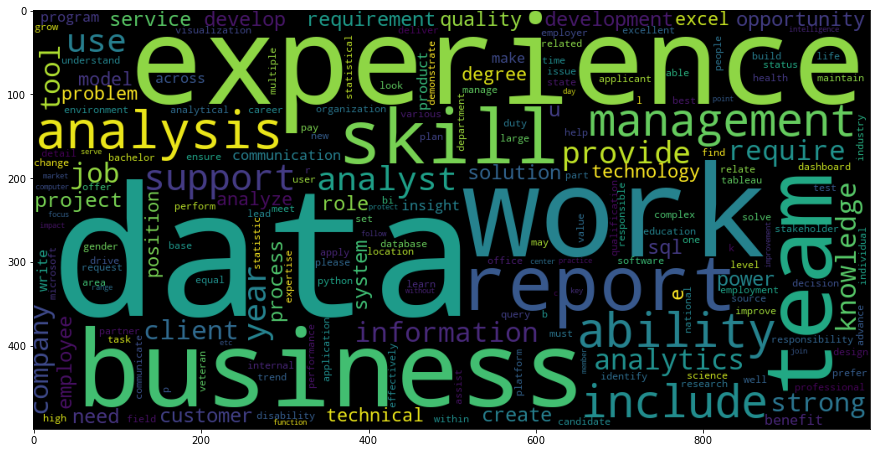

In [443]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fq)
#Create a word cloud for most frequent words in data analyst ads
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [375]:
fq

FreqDist({'data': 1078, 'work': 444, 'experience': 420, 'business': 304, 'team': 234, 'report': 211, 'skill': 201, 'analysis': 190, 'ability': 176, 'management': 162, ...})

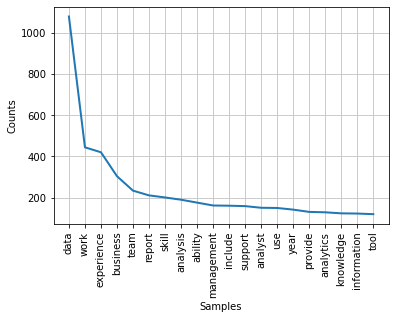

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [376]:
fq.plot(20) #Create a frequency plot

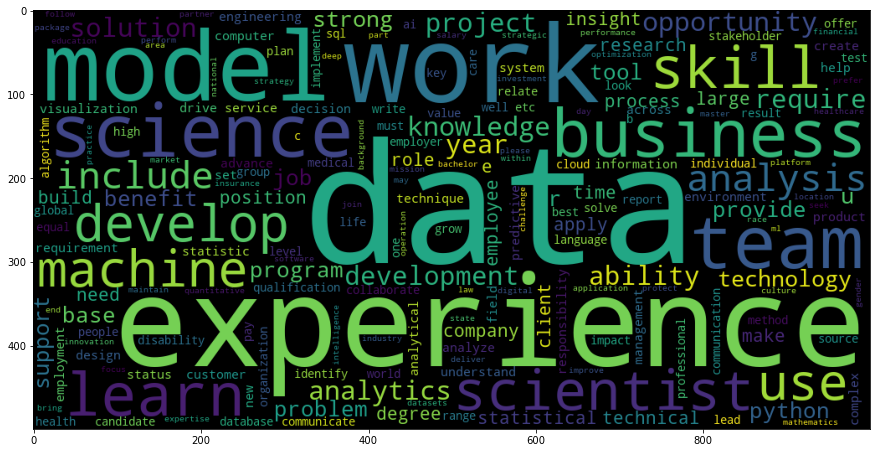

In [440]:
words = clean_text(sci) #Repeat this process for data scientists
fq = nltk.FreqDist(w for w in words if w.isalnum())
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fq)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [378]:
fq

FreqDist({'data': 1065, 'experience': 538, 'work': 378, 'model': 299, 'science': 285, 'team': 285, 'business': 273, 'learn': 220, 'skill': 210, 'scientist': 195, ...})

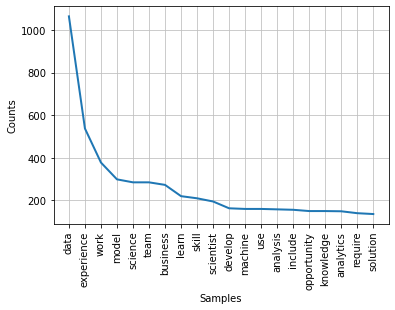

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [426]:
fq.plot(20)

Here, we can see the top 20 most frequent words for data analyst and scientist ads. They seem to share a lot of frequent words like data (which might not be a surprise), experience, work, skill and etc.

In [ ]:
import pandas as pd
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
import nltk
import numpy as np
import re
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def raw_text(url):
    """Takes a URL as input and performs web scrapping to retrieve the body of the
    webpage (in this case a Linkedin ad)"""
    ad = requests.get(url) #Retrieve webpage
    Html = BeautifulSoup(ad.text, 'html.parser') #Convert html into a nicer format
    text_body = Html.find_all('div', 
                              {'class':"show-more-less-html__markup show-more-less-html__markup--clamp-after-5"})
    text_body = text_body[0].text
    return text_body
def clean_text(doc):
    """Take an unstructured document and tokenize it into a list of words. 
    Then standardize it by lowercasing and lemmatizing each word"""
    words = re.findall(r'(?:[a-zA-Z]|#|"+")+',doc) #Find all alphabetical words (Preserve + and # for C++ and C#)
    clean = [i for i in words if i.isupper() or i.islower()] #Retrieve all words that aren't glued to each other
    dirty = [i for i in words if not i.islower() and not i.isupper()] #Retrieve words stuck together
    dirty = [re.findall('[a-zA-Z][^A-Z]*',i) for i in dirty] #Split all the tangled words ie split 'ThisExample' into ['This','Example']
    clean2 = [j for i in dirty for j in i] #Unlist the list of lists
    words = clean + clean2 #Combine all the words together
    stopwords = nltk.corpus.stopwords.words("english")
    words = [i.lower() for i in words] #Lowercase all words
    words = [i for i in words if i not in stopwords] #Filter out stopwords
    tag_words = nltk.pos_tag(words) #Begin lemmatizing by tagging each word
    tag_words = [(i, wordnet_pos(j)) for (i, j) in tag_words] #Convert the tags into something the lemmatizer understands
    lemmatizer = nltk.WordNetLemmatizer()
    clean_words = [lemmatizer.lemmatize(i, j) for i, j in tag_words] #Lemmatize the words
    #Document should be cleaned up
    return clean_words
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN) #Function created by Bo Ning in Week 6-2
def unlist(LIST):
    """Take a list and concatenate all objects inside"""
    STRING = ''
    for i in LIST:
        STRING = STRING +' '+ i
    STRING = STRING.strip() #Get rid of white space
    return STRING
analyst = pd.read_csv('data_analyst.csv')
science = pd.read_csv('data_scientist.csv')
def f(x):
    x = x.strip('$')
    x = x.replace(',','')
    return x
science.loc[~science['Salary'].isna(),'Salary'] = science.loc[~science['Salary'].isna(),'Salary'].map(f)
science['Salary'] = science['Salary'].astype(float)
science
df = pd.concat([analyst,science])
df = df.iloc[:,1:]
df = df.drop_duplicates() #Drop duplicate ads
df = df.reset_index(drop = True)
analysts = df.loc[df['Type'] == 'Analyst','url']
analysts = analysts.tolist() #Extract all the urls for Data Analyst Ads
scientists = df.loc[df['Type'] == 'Scientist','url']
scientists = scientists.tolist() #Extract all the urls for Data Scientist Ads
anl_text1 = [raw_text(i) for i in analysts[:10]] #Retrieve the body of the first 10 Linkedin
#Ads for Data Analysts. Do this to the rest of the ads for Analysts and Scientists.
anl_text2 = [raw_text(i) for i in analysts[10:20]]
anl_text3 = [raw_text(i) for i in analysts[20:30]]
anl_text4 = [raw_text(i) for i in analysts[30:40]]
anl_text5 = [raw_text(i) for i in analysts[40:50]]
anl_text6 = [raw_text(i) for i in analysts[50:60]]
anl_text7 = [raw_text(i) for i in analysts[60:70]]
anl_text8 = [raw_text(i) for i in analysts[70:80]]
anl_text9 = [raw_text(i) for i in analysts[80:90]]
anl_text10 = [raw_text(i) for i in analysts[90:]]
sci_text1 = [raw_text(i) for i in scientists[:10]]
sci_text2 = [raw_text(i) for i in scientists[10:20]]
sci_text3 = [raw_text(i) for i in scientists[20:30]]
sci_text4 = [raw_text(i) for i in scientists[30:40]]
sci_text5 = [raw_text(i) for i in scientists[40:50]]
sci_text6 = [raw_text(i) for i in scientists[50:60]]
sci_text7 = [raw_text(i) for i in scientists[60:70]]
sci_text8 = [raw_text(i) for i in scientists[70:80]]
sci_text9 = [raw_text(i) for i in scientists[80:90]]
sci_text10 = [raw_text(i) for i in scientists[90:]]
anl_text =  (anl_text1 + anl_text2 + anl_text3 + anl_text4 + anl_text5 +
            anl_text6 +anl_text7 + anl_text8 + anl_text9 + anl_text10) #Combine 
#all the bodies of the text into one list
sci_text = (sci_text1 + sci_text2 + sci_text3 + sci_text4 + sci_text5 + sci_text6 +
           sci_text7 + sci_text8 + sci_text9 + sci_text10) #Do the same for scientists
clean_anl = [clean_text(i) for i in anl_text] #Clean the text by lowercasing lemmatizing
#And removing stopwords with our function clean_text
clean_sci = [clean_text(i) for i in sci_text]
anl_par = [unlist(i) for i in clean_anl] #Put the words back into sentences so we can 
#Use our model
sci_par = [unlist(i) for i in clean_sci]
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True)
#Fit a bag of words model where order doesn't matter and the "frequency" is binary
#for data analyst ads
freq = vec.fit_transform(anl_par)
sim = normalize(freq.todense(), axis = 1, norm = 'l2') #Normalize vectors
similarity = pd.DataFrame(sim @ sim.T) #Calculate cosine similarity
((similarity <.3) & (similarity>.1)).values.sum()
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True) #Repeat this process for data scientist ads
freq = vec.fit_transform(sci_par)
sim = normalize(freq.todense(), axis = 1, norm = 'l2') 
similarity = pd.DataFrame(sim @ sim.T)
((similarity <.3) & (similarity>.1)).values.sum()
anly = unlist(anl_par) #Pool 100 data analyst ads into one document 
sci = unlist(sci_par) #Pool 100 data scientist ads into one document 
vec = CountVectorizer(tokenizer = nltk.word_tokenize, binary = True) #Fit a bag of words model
#and make the "frequency" binary
freq = vec.fit_transform([anly,sci])
sim = normalize(freq.todense(), axis = 1, norm = 'l2') #Normalize the vectors
similarity = pd.DataFrame(sim @ sim.T, index = ['Analyst','Scientist'],
                          columns = ['Analyst','Scientist']) #Compute cosine similarity
words = clean_text(anly) #Split all the words in the 100 data analyst ads into words
fq = nltk.FreqDist(w for w in words if w.isalnum()) #Count the frequencies of the words
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fq)
#Create a word cloud for most frequent words in data analyst ads
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
fq.plot(20) #Create a frequency plot
words = clean_text(sci) #Repeat this process for data scientists
fq = nltk.FreqDist(w for w in words if w.isalnum())
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(fq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
fq.plot(20)